In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# Less is more. Keep it simple

- All of this analysis was done straight to the point to achieve the goal quickly and efficiently without the unneccasy 'candy wrapping' of hundred uncessary histograms, charts and comparisons to look 'smart'. Time is money. So here it is, clean and simple.

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')



In [4]:
y = df_train['Survived']
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

X.fillna(X.mean())
X_test.fillna(X_test.mean())

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.50000,0,0,7.8292,0,1
1,3,47.00000,1,0,7.0000,1,0
2,2,62.00000,0,0,9.6875,0,1
3,3,27.00000,0,0,8.6625,0,1
4,3,22.00000,1,1,12.2875,1,0
...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,1
414,1,39.00000,0,0,108.9000,1,0
415,3,38.50000,0,0,7.2500,0,1
416,3,30.27259,0,0,8.0500,0,1


- define xgboost hyperparameters
- training the model

In [5]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate = 0.05,
                     n_estimators=300,
                     max_depth = 4)
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [6]:
predictions = model.predict(X_test)
print(predictions)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [7]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
imputed_X_train = my_imputer.fit_transform(X)
imputed_X_test = my_imputer.transform(X_test)

- Model evaluation of accuracy:

In [8]:
predictions = model.predict(X_test)
print(predictions)


[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


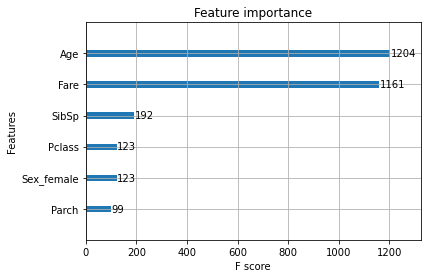

In [9]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model)
plt.show()

### As i suspected, the most important feature in survival rate was the Fare. Obviously the VIP's had the priority boarding upon embarking and also upon emergency. From those VIP's first came the youngest ones, women and children in the family, hence the 'Age' being selected as the second most import feature in survival rate. Conclusion of the story - Money buys priority in life. 

- making a kaggle export:

In [10]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Lets try CatbBoost

In [11]:
import pandas as pd
import numpy as np
import hyperopt
!pip install catboost==0.23.2
from catboost import Pool, CatBoostClassifier, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')


In [12]:
train.fillna(-999, inplace=True)
test.fillna(-999, inplace=True)

In [13]:
y = train.Survived
X = train.drop(['Survived'], axis =1)

X_test = test




In [14]:
cate_features_index = np.where(X.dtypes != float)[0]
cate_features_index

array([ 0,  1,  2,  3,  5,  6,  7,  9, 10])

1. #### make the X for train and test, also called VALIDATION data ::

In [15]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y, train_size=0.20, random_state=15)

### make CatBoost model, implement -> use_best_model parameters, will make the model prevent Overfitting ::

In [16]:
model = CatBoostClassifier(iterations=2000, learning_rate=0.01, l2_leaf_reg=4, depth=6, rsm=1, loss_function= 'Logloss', eval_metric='AUC',use_best_model=True,random_seed=42)

### Make the model to fit the data ::

In [17]:
model.fit(Xtrain,ytrain, cat_features=cate_features_index, eval_set=(Xtest,ytest))
print(model.get_best_score())

0:	test: 0.8279312	best: 0.8279312 (0)	total: 54.7ms	remaining: 1m 49s
1:	test: 0.8396734	best: 0.8396734 (1)	total: 58.2ms	remaining: 58.2s
2:	test: 0.8405821	best: 0.8405821 (2)	total: 59.2ms	remaining: 39.4s
3:	test: 0.8428330	best: 0.8428330 (3)	total: 61.9ms	remaining: 30.9s
4:	test: 0.8423744	best: 0.8428330 (3)	total: 63.3ms	remaining: 25.3s
5:	test: 0.8379685	best: 0.8428330 (3)	total: 66.2ms	remaining: 22s
6:	test: 0.8379685	best: 0.8428330 (3)	total: 67.2ms	remaining: 19.1s
7:	test: 0.8384646	best: 0.8428330 (3)	total: 70.4ms	remaining: 17.5s
8:	test: 0.8416325	best: 0.8428330 (3)	total: 74.8ms	remaining: 16.6s
9:	test: 0.8472014	best: 0.8472014 (9)	total: 78.6ms	remaining: 15.6s
10:	test: 0.8475807	best: 0.8475807 (10)	total: 82.1ms	remaining: 14.9s
11:	test: 0.8510988	best: 0.8510988 (11)	total: 86.7ms	remaining: 14.4s
12:	test: 0.8516698	best: 0.8516698 (12)	total: 90.9ms	remaining: 13.9s
13:	test: 0.8516698	best: 0.8516698 (12)	total: 91.8ms	remaining: 13s
14:	test: 0.852

- making the pred to be integers for submission:

In [18]:
pred = model.predict(X_test)
print(pred)

[0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


make submission CSV:

In [19]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': pred})
output.to_csv('cat_boost_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# A different approach

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Drop irrelevant columns (Ticket and PassengerId)
- Remap Sex column to zeros and ones
- Check if a passenger had a unique title (like doctor) or had something more generic (like Mr., Miss.) — can be extracted from the Name column
- Check if cabin information was known — if the value of Cabin column is not NaN
- Create dummy variables from the Embarked column — 3 options
- Fill Age values with the simple mean

In [22]:
df_train.drop(['Ticket','PassengerId'], axis=1, inplace=True)

gender_mapper = {'male': 0, 'female': 1}
df_train['Sex'].replace(gender_mapper, inplace=True)

df_train['Title'] = df_train['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0])
df_train['Title'] = [0 if x in ['Mr.', 'Miss.', 'Mrs.'] else 1 for x in df_train['Title']]
df_train = df_train.rename(columns={'Title': 'Title_Unusual'})
df_train.drop('Name', axis = 1, inplace=True)

df_train['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in df_train['Cabin']]
df_train.drop('Cabin', axis=1, inplace=True)

emb_dummies = pd.get_dummies(df_train['Embarked'], drop_first=True, prefix='Embarked')
df_train = pd.concat([df_train, emb_dummies], axis = 1)
df_train.drop('Embarked', axis=1, inplace=True)

df_train['Age'] = df_train['Age'].fillna(int(df_train['Age'].mean()))
                     

In [23]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Unusual,Cabin_Known,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,1,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1


- perform train test split:

In [24]:
X = df_train.drop('Survived', axis=1)  #features or predictors excluding the target value
y = df_train['Survived']   #target value aka the one we are trying to predict

X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.8)

- using standard scale to the train data and transform both train and test data

In [25]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [26]:
from tpot import TPOTClassifier

- training process:

In [27]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=10)
tpot.fit(X_train_scaled, y_train)


Generation 1 - Current best internal CV score: 0.841307987786861
Generation 2 - Current best internal CV score: 0.841307987786861
Generation 3 - Current best internal CV score: 0.8482615975573722
Generation 4 - Current best internal CV score: 0.848300994779868
10.02 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: MLPClassifier(FastICA(input_matrix, tol=0.5), alpha=0.01, learning_rate_init=0.5)


TPOTClassifier(log_file=<ipykernel.iostream.OutStream object at 0x7f36a6d88c50>,
               max_time_mins=10, verbosity=2)

In [28]:
tpot.fitted_pipeline_

Pipeline(steps=[('fastica', FastICA(tol=0.5)),
                ('mlpclassifier',
                 MLPClassifier(alpha=0.01, learning_rate_init=0.5))])

In [29]:
tpot.score(X_test_scaled, y_test)

0.8044692737430168

ewww. Didnt find a better pipeline that catboost. Probably needed more time to run.